In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ln -s /content/gdrive/My\ Drive/yolonet /yolofolder
!ls /yolofolder

backup		   obj.data   obj.zip	    yolonet
exp_image	   obj.names  okgg	    yolov3_custom2.cfg
generate_train.py  objori     yololo.ipynb


In [5]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13733, done.
remote: Total 13733 (delta 0), reused 0 (delta 0), pack-reused 13733
Receiving objects: 100% (13733/13733), 12.31 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (9369/9369), done.


In [8]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/darknet


In [9]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [10]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
#!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-22 12:11:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights       13%[=>                  ]  31.15M   140KB/s    eta 23m 58s^C


In [11]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
 
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
#!./darknet detect <path to config> <path to weights> <path to image>
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

In [ ]:
imShow('predictions.jpg')

In [12]:
!ls /content/gdrive/'My Drive'/yolonet

backup		   obj.data   obj.zip	    yolonet
exp_image	   obj.names  okgg	    yolov3_custom2.cfg
generate_train.py  objori     yololo.ipynb


In [13]:
!cp /yolofolder/obj.zip ../

In [14]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/__MACOSX/._obj     
  inflating: data/obj/rifle_images-4.jpeg  
  inflating: data/__MACOSX/obj/._rifle_images-4.jpeg  
  inflating: data/obj/gs_images-64.jpeg  
  inflating: data/__MACOSX/obj/._gs_images-64.jpeg  
  inflating: data/obj/mask_images-18.jpeg  
  inflating: data/__MACOSX/obj/._mask_images-18.jpeg  
  inflating: data/obj/rifle_images-82.jpeg  
  inflating: data/__MACOSX/obj/._rifle_images-82.jpeg  
  inflating: data/obj/mask_images-67.txt  
  inflating: data/__MACOSX/obj/._mask_images-67.txt  
  inflating: data/obj/mask_images-73.txt  
  inflating: data/__MACOSX/obj/._mask_images-73.txt  
  inflating: data/obj/gs_images-80.txt  
  inflating: data/__MACOSX/obj/._gs_images-80.txt  
  inflating: data/obj/gs_images-33.jpeg  
  inflating: data/__MACOSX/obj/._gs_images-33.jpeg  
  inflating: data/obj/gs_images-43.txt  
  inflating: data/__MACOSX/obj/._gs_images-43.txt  
  inflating: data/obj/gs_images-57.txt  
  inflat

In [ ]:
#!cp cfg/yolov3.cfg /content/gdrive/'My Drive'/yolonet/yolov3_custom2.cfg

In [15]:
!cp /yolofolder/yolov3_custom2.cfg ./cfg

In [16]:
!cp /yolofolder/obj.names ./data
!cp /yolofolder/obj.data  ./data

In [17]:
!cp /yolofolder/generate_train.py ./

In [18]:
!python generate_train.py

In [ ]:
!ls

3rdparty		  darknet53.conv.74	  LICENSE
backup			  darknet53.conv.74.1	  Makefile
build			  DarknetConfig.cmake.in  net_cam_v3.sh
build.ps1		  darknet.py		  obj
build.sh		  darknet_video.py	  README.md
cfg			  data			  results
chart.png		  generate_train.py	  scripts
chart_yolov3_custom2.png  image_yolov2.sh	  src
cmake			  image_yolov3.sh	  video_v2.sh
CMakeLists.txt		  include		  video_yolov3.sh
darknet			  json_mjpeg_streams.sh   yolov3.weights


In [19]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-06-22 19:09:25--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-06-22 19:09:26--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74     0%[                    ] 487.70K   190KB/s               ^C


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show

流式输出内容被截断，只能显示最后 5000 行内容。
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.650264, GIOU: 0.636093), Class: 0.995941, Obj: 0.719537, No Obj: 0.002608, .5R: 0.750000, .75R: 0.250000, count: 4, class_loss = 0.182682, iou_loss = 0.312181, total_loss = 0.494863 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000041, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000025, iou_loss = 0.000000, total_loss = 0.000025 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000015, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
 total_bbox = 85353, rewritten_bbox = 0.076154 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.701079, GIOU: 0.683087), Class: 0.989651, Obj: 0.753960, No Obj: 0.003027, .5R: 0.857143,

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /yolofolder/backup/yolov3_custom2_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom2
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

In [20]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/darknet/cfg
/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

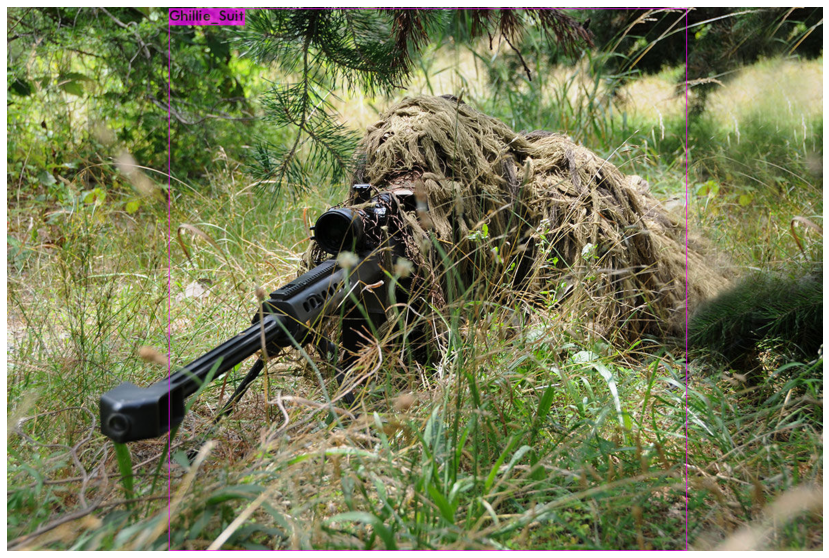

In [24]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /yolofolder/backup/yolov3_custom2_last.weights /yolofolder/exp_image/gs_CD34.jpg -thresh 0.05
imShow('predictions.jpg')